<a href="https://colab.research.google.com/github/yacine-yefsah/Immobilier-Prediction-ML/blob/main/immobilier_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prédiction des Prix des Maisons à Boston**

**Exploration des Données (EDA)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 1. Chargement des données (Dataset Boston Housing)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [8]:
# 2. Vérification de la structure
print("--- Taille du dataset (Lignes, Colonnes) ---")
print(df.shape)

print("\n--- Types de données et valeurs manquantes ---")
print(df.info())

print("\n--- Somme des valeurs nulles par colonne ---")
print(df.isnull().sum())

--- Taille du dataset (Lignes, Colonnes) ---
(506, 14)

--- Types de données et valeurs manquantes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

--- Somme des valeurs nulles par colonne ---
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age

In [9]:
# 3. Affichage des 5 premières lignes
print("\n--- Aperçu des données ---")
df.head()


--- Aperçu des données ---


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Résumé Statistique et Distribution**

In [10]:
# 1. Résumé statistique complet
print("--- Résumé Statistique (Variables Numériques) ---")
print(df.describe())

--- Résumé Statistique (Variables Numériques) ---
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18

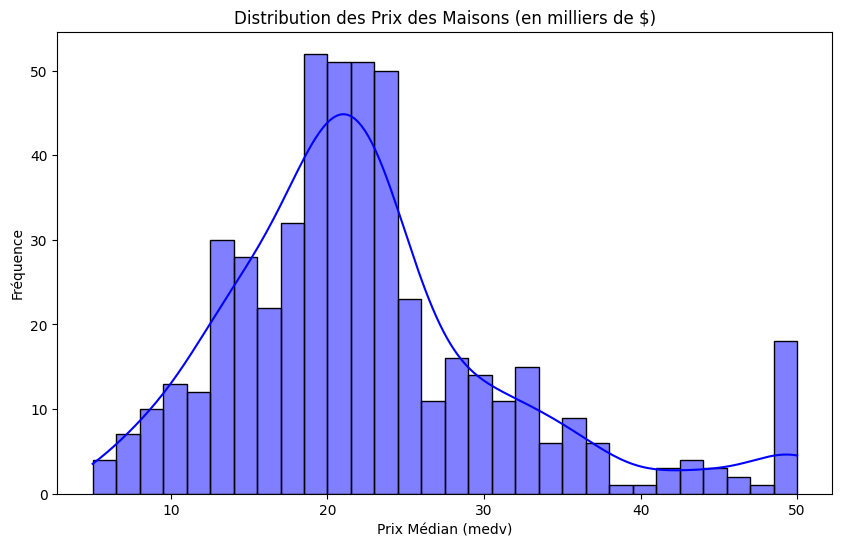

In [20]:
# 2. Visualisation de la distribution du prix (medv)
plt.figure(figsize=(10, 6))
sns.histplot(df['medv'], kde=True, color='blue', bins=30)
plt.title('Distribution des Prix des Maisons (en milliers de $)')
plt.xlabel('Prix Médian (medv)')
plt.ylabel('Fréquence')
plt.show()

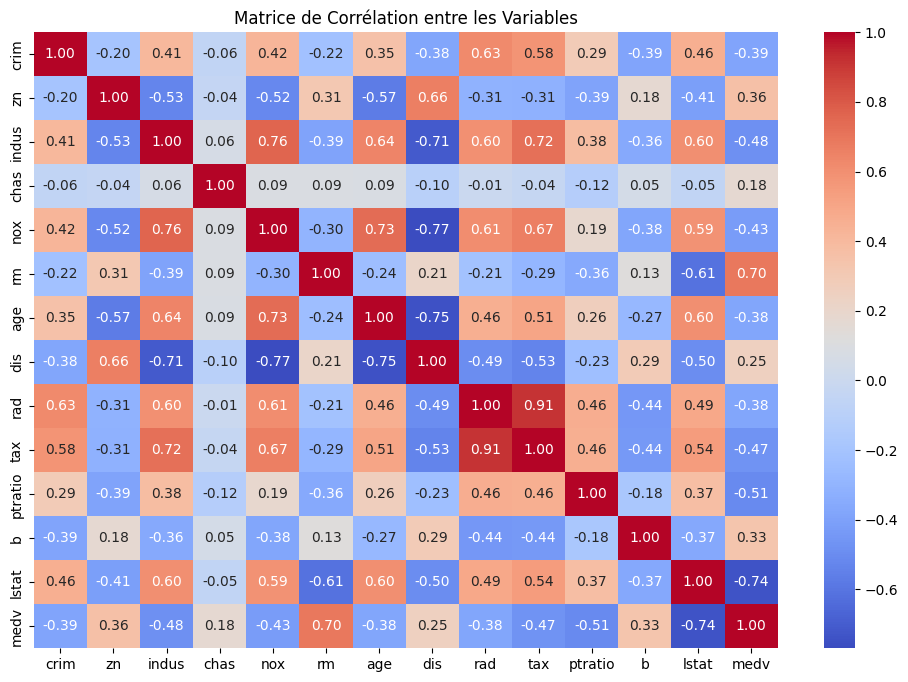

In [13]:
# 3. Matrice de corrélation (Pour voir qui influence le prix)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation entre les Variables')
plt.show()

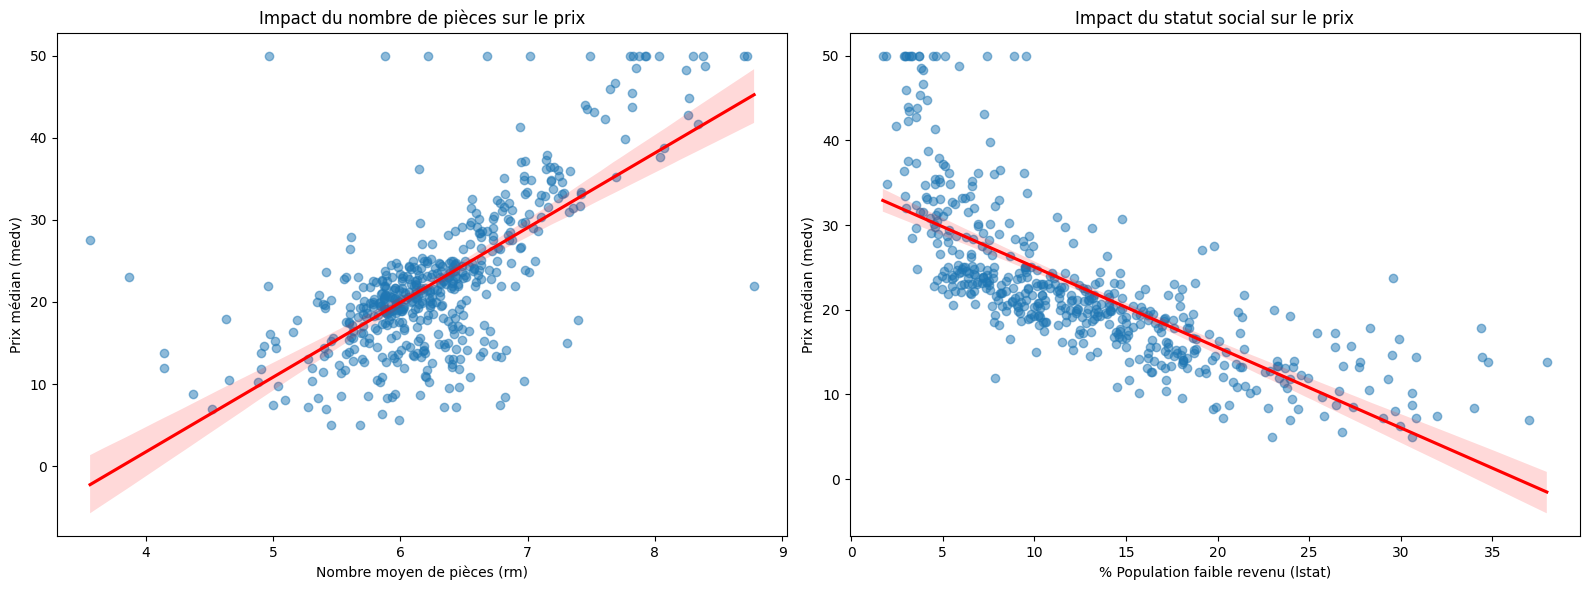

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 4. Relation entre le nombre de pièces (rm) et le prix (medv)
sns.regplot(x='rm', y='medv', data=df, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title('Impact du nombre de pièces sur le prix')
axes[0].set_xlabel('Nombre moyen de pièces (rm)')
axes[0].set_ylabel('Prix médian (medv)')

# 5. Relation entre le statut social (lstat) et le prix (medv)
sns.regplot(x='lstat', y='medv', data=df, ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title('Impact du statut social sur le prix')
axes[1].set_xlabel('% Population faible revenu (lstat)')
axes[1].set_ylabel('Prix médian (medv)')

plt.tight_layout()
plt.show()

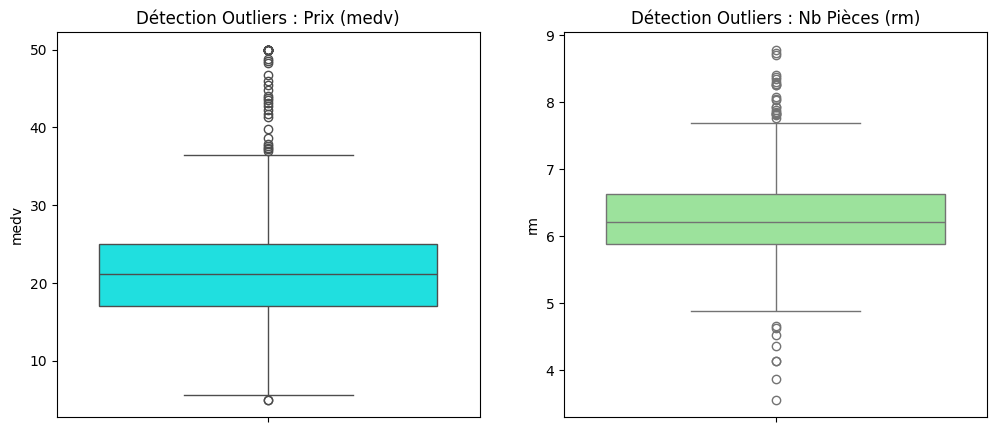

Nombre de valeurs aberrantes détectées pour le prix : 40


In [15]:
# Création de boxplots pour détecter les valeurs aberrantes
plt.figure(figsize=(12, 5))

# Boxplot pour le Prix
plt.subplot(1, 2, 1)
sns.boxplot(y=df['medv'], color='cyan')
plt.title('Détection Outliers : Prix (medv)')

# Boxplot pour le Nombre de pièces
plt.subplot(1, 2, 2)
sns.boxplot(y=df['rm'], color='lightgreen')
plt.title('Détection Outliers : Nb Pièces (rm)')

plt.show()

# Calcul du nombre d'outliers pour le prix avec la méthode IQR (Interquartile Range)
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['medv'] < (Q1 - 1.5 * IQR)) | (df['medv'] > (Q3 + 1.5 * IQR))]

print(f"Nombre de valeurs aberrantes détectées pour le prix : {len(outliers)}")

**Modélisation Linéaire Initiale**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Sélection des variables (on prend tout sauf le prix pour prédire le prix)
X = df.drop('medv', axis=1)
y = df['medv']

# 2. Division 80% entraînement / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prédiction sur les données qu'il n'a jamais vues
y_pred = model.predict(X_test)

# 5. Évaluation des performances
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Précision du modèle (R²) : {r2:.4f}")
print(f"Erreur moyenne (RMSE) : {rmse:.4f}")

Précision du modèle (R²) : 0.6688
Erreur moyenne (RMSE) : 4.9286


**Nettoyage des Données et Modélisation Améliorée**

In [17]:
# 1. On crée un nouveau dataset sans les outliers sur le prix (medv)
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3 - Q1

# On ne garde que les lignes qui sont dans la norme
df_clean = df[(df['medv'] >= (Q1 - 1.5 * IQR)) & (df['medv'] <= (Q3 + 1.5 * IQR))]

print(f"Ancienne taille : {len(df)}")
print(f"Nouvelle taille après nettoyage : {len(df_clean)}")

# 2. On relance le modèle sur ces données propres
X_c = df_clean.drop('medv', axis=1)
y_c = df_clean['medv']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

model_c = LinearRegression()
model_c.fit(X_train_c, y_train_c)

# 3. Évaluation
y_pred_c = model_c.predict(X_test_c)
r2_c = r2_score(y_test_c, y_pred_c)
rmse_c = np.sqrt(mean_squared_error(y_test_c, y_pred_c))

print(f"\n--- Résultats après nettoyage ---")
print(f"Nouveau R² : {r2_c:.4f}")
print(f"Nouveau RMSE : {rmse_c:.4f}")

Ancienne taille : 506
Nouvelle taille après nettoyage : 466

--- Résultats après nettoyage ---
Nouveau R² : 0.7525
Nouveau RMSE : 3.1511


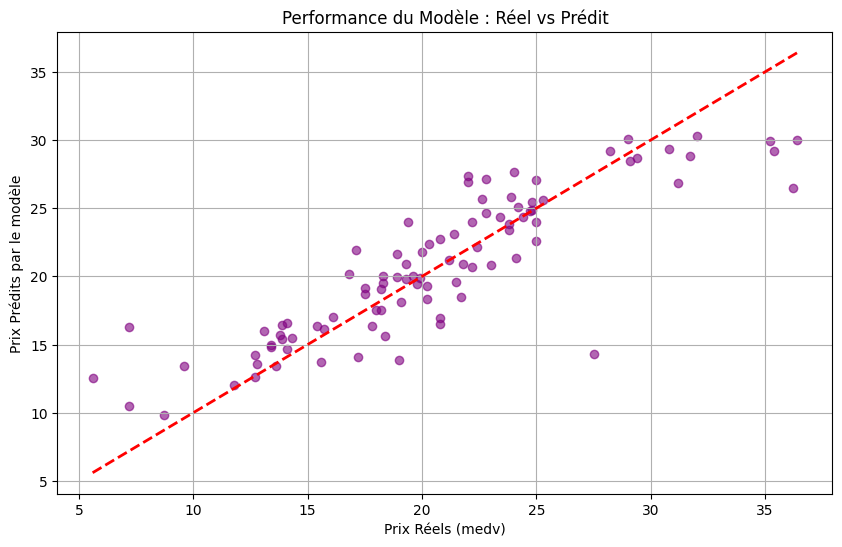


--- Impact de chaque variable sur le prix ---
         Coefficient
rm          2.335809
chas        0.693134
rad         0.197262
zn          0.030330
b           0.007961
tax        -0.010850
age        -0.024199
indus      -0.043770
crim       -0.087611
lstat      -0.308183
ptratio    -0.768034
dis        -1.003649
nox       -12.991882


In [18]:
# Graphique de comparaison : Valeurs réelles vs Prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_c, y_pred_c, alpha=0.6, color='purple')

# Tracé de la ligne de perfection (y = x)
plt.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], 'r--', lw=2)

plt.title('Performance du Modèle : Réel vs Prédit')
plt.xlabel('Prix Réels (medv)')
plt.ylabel('Prix Prédits par le modèle')
plt.grid(True)
plt.show()

# Petit bonus : On regarde l'importance des variables
coefficients = pd.DataFrame(model_c.coef_, X_c.columns, columns=['Coefficient'])
print("\n--- Impact de chaque variable sur le prix ---")
print(coefficients.sort_values(by='Coefficient', ascending=False))